# Perceptron

Answer all marked questions (❓).  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1

Consider the following linearly separable training set:

$\mathbf{x^{(1)}} =\begin{bmatrix} -1 \\ 0  \\ \end{bmatrix} $,  $\mathbf{x^{(2)}} =\begin{bmatrix} 0 \\ 0.25  \\ \end{bmatrix} $,   $\mathbf{x^{(3)}} =\begin{bmatrix} 1 \\ 1 \\ \end{bmatrix} $,      $\mathbf{x^{(4)}} =\begin{bmatrix} 1 \\ -1  \\ \end{bmatrix} $

$y^{(1)} = -1$, $y^{(2)} = +1$, $y^{(3)} = +1$, $y^{(4)} = -1$


In [237]:
# Define points
inputs = np.array([[-1, 0], [0, 0.25], [1, 1], [1, -1]])
labels = np.array([-1, 1, 1, -1])

num_examples, num_features = np.shape(inputs)

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

print(np.shape(inputs))

(4, 3)


❓ Let us use the perceptron algorithm to separate the two classes of points.

1. Initialize all weights to zero (including the bias) 
2. Assume $sign(z) = +1$ iff $z ≥ 0$, and $−1$ if $z < 0$ 
3. Complete provided fucntion `perceptron_epoch` which performs one epoch of the perceptron algorithm
4. Use a learning rate of one
5. Apply algorithm until convergence 

Note: You can use provided function `plot_separation_line` to see the points and the separating hyperplane in each epoch

In [238]:
"""
Function to execute perceptron epoch. 

Receives inputs, labels, previous weights (w) and learning rate(eta)

Should output number of mistakes and new weights

"""

def perceptron_epoch(inputs, labels, w, eta):
    mistakes = 0
    
    for i,x in enumerate(inputs):
        z = np.sign(w.T.dot(x))
        if z != labels[i]:

            mistakes += 1
            
            w = w + eta * labels[i] * x
    
    print("Mistakes: %d" % mistakes)
    return mistakes, w

In [239]:
# Plot separation line associated with model w, along with the data.
def plot_separation_line(inputs, labels, w):
    # Plot data.
    plt.plot(inputs[labels == -1, 1], inputs[labels == -1, 2], "b.")
    plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
    # Plot model separation line.
    x1 = np.array([-2, 2])
    x2 = (-w[0] - w[1]*x1) / w[2]
    plt.plot(x1, x2, 'k--')
    plt.show()

In [240]:
# TODO: Inititalize weights and apply algorithm until convergence
weights = np.zeros([3,])
print(weights)
mistakes = 1
while mistakes != 0:    
    mistakes, weights = perceptron_epoch(inputs, labels, weights, 1)
    print(mistakes,weights)

[0. 0. 0.]
Mistakes: 3
3 [-1.    0.    1.25]
Mistakes: 1
1 [0.  0.  1.5]
Mistakes: 2
2 [0.   1.   1.75]
Mistakes: 0
0 [0.   1.   1.75]


❓ What is the perceptron output for query point $\begin{bmatrix} 0 && 1   \end{bmatrix}^T$?

In [241]:
# TODO
x = np.array([1, 0, 1])
print(np.sign(weights.T.dot(x)))

1.0


❓ Change the initialization of weights and biases to be random with a standard normal distribution $\mathcal{N}(0,1)$. Try multiple times. Does it always converge?

*Hint:* `np.random.randn`

In [260]:
# TODO
weights = np.random.randn(3)
print(weights)
mistakes = 1
while mistakes != 0:    
    mistakes, weights = perceptron_epoch(inputs, labels, weights, 1)
    print(mistakes,weights)

# IT ALWAYS CONVERGES

[ 1.28621308 -1.33989459 -0.61937915]
Mistakes: 3
3 [ 0.28621308 -0.33989459  1.38062085]
Mistakes: 2
2 [0.28621308 0.66010541 1.63062085]
Mistakes: 0
0 [0.28621308 0.66010541 1.63062085]


## Question 2 

Let us generate a balanced dataset with 30 examples in $\mathbb{R}^2$ and 3 classes. 
Assume each of the 10 inputs associated to class $k \in \{0,1,2\}$ is generated as $x \sim \mathcal{N}(\mu_k, \sigma_k^2 I)$, with $\sigma_0=\sigma_1=\sigma_2 = 1$, 
$\mu_0 = [0, 0]^\top$, $\mu_1 = [0, 3]^\top$, and $\mu_2 = [2, 2]^\top$.

❓ Plot the data

In [265]:
inputs0 = np.array([0, 0]) + np.random.randn(10, 2)
inputs1 = np.array([0, 3]) + np.random.randn(10, 2)
inputs2 = np.array([2, 2]) + np.random.randn(10, 2)

inputs = np.concatenate([inputs0, inputs1, inputs2], axis=0)

labels = np.array([0]*10 + [1]*10 + [2]*10)

# Shuffling observations
ind = np.random.permutation(30)
inputs = inputs[ind, :]
labels = labels[ind]

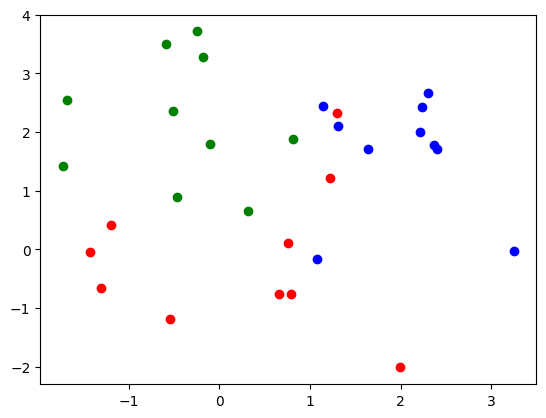

In [268]:
# TODO: plot data
plt.scatter(inputs[labels==0][:,1],inputs[labels==0][:,2], c='Red')
plt.scatter(inputs[labels==1][:,1],inputs[labels==1][:,2], c='Green')
plt.scatter(inputs[labels==2][:,1],inputs[labels==2][:,2], c='Blue')
plt.show()

❓ Implement the multi-class perceptron algorithm by completing the `multi_class_perceptron_epoch` function. 

❓ Complete function `multi_class_classify` so that it provides the predicted labels given the inputs and the weights.

❓ Create or import a function that computes accuracy given the arrays of predicted and correct labels.

❓ Run 100 iterations of the algorithm, initializing all the weights to zero and using a learning rate of one. Save the accuracy of each epoch in a list. 

❓ What is the training accuracy (fraction of points that are correctly classified)?

❓ Plot the accuracies over epochs.

Note: Don't forget you have to augment the `inputs` with a dimension for the bias!

In [266]:
# TODO: increment inputs with bias:
inputs = np.concatenate([np.ones((30, 1)), inputs], axis = 1)


In [ ]:
def multi_class_perceptron_epoch(inputs, labels, W, eta=1):
    mistakes = 0
    for x, y in zip(inputs, labels):
        
        z = np.argmax(W.T.dot(x))
        if z != y:
            W[:,y] = W[:,y] + eta * x
            W[:,z] = W[:,z] - eta * x
            mistakes += 1

    return W

In [226]:
def multi_class_classify(inputs, W):
    
    predictions =  [np.argmax(W.T.dot(x)) for x in inputs]
    
    return predictions

In [151]:
# TODO: function to compute accuracy
def accuracy(predictions, labels):
    return np.sum(np.equal(predictions,labels)) / np.size(predictions)


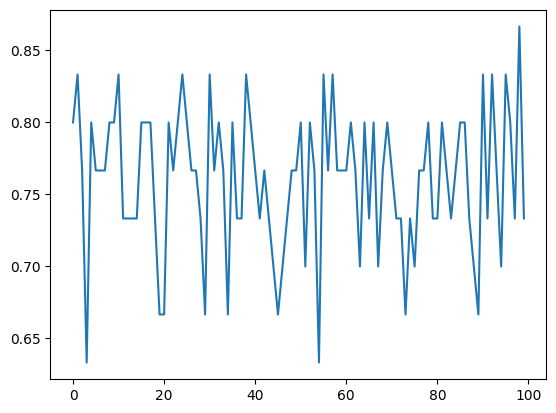

In [292]:
# TODO: Run algorithm, compute final accuracies, plot accuracies over epochs
W = np.zeros((3,3))
mistakes = 1
acc = [0] * 100
for i in range(100):
    W = multi_class_perceptron_epoch(inputs, labels, W, 1)
    # print(W)
    predictions = multi_class_classify(inputs, W)
    acc[i] = accuracy(predictions, labels)
plt.plot(acc)

## Question 3

Now it's time to try the perceptron on real data and see what happens.  

Let's load the UCI handwritten digits dataset using `scikit-learn`

In [293]:
from sklearn.datasets import load_digits
data = load_digits()

In [294]:
X = data['data']
y = data['target']

In [295]:
num_examples, num_features = np.shape(X)
num_labels = np.max(y)+1  # labels are 0, 1, ..., num_labels-1

# Augment points with a dimension for the bias.
X = np.concatenate([np.ones((num_examples, 1)), X], axis=1)

In [333]:
print(np.shape(X))

(1797, 65)


This is a dataset containing $1797$ 8x8 input images of digits, each corresponding to one out of 10 output classes. 
You can print the dataset description with `print(data.DESCR)
` and visualize some input examples:

<Figure size 640x480 with 0 Axes>

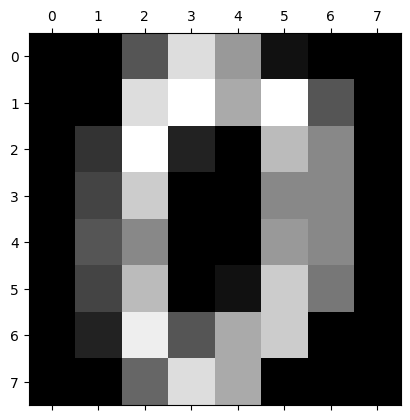

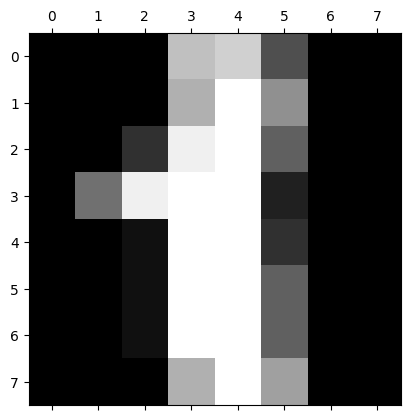

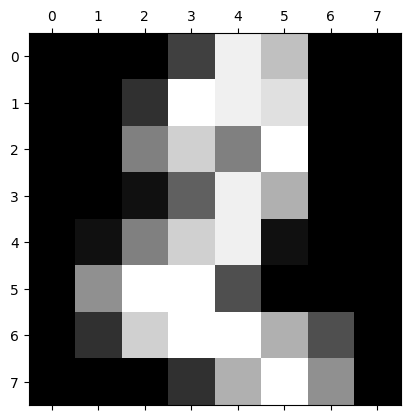

In [296]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(3):
    plt.matshow(data.images[i])
plt.show()

We randomly split this data into training (80\%) and test (20\%) partitions. This can be done with:

In [297]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

❓ Run your implementation of the multi-class perceptron algorithm on this dataset. Measure the training and test accuracy. 

Training accuracy [0.872651356993737, 0.8893528183716075, 0.8503827418232429, 0.8740431454418929, 0.8928322894919972, 0.9262352122477383, 0.9568545581071677, 0.9485038274182325, 0.9352818371607515, 0.9714683368128044]
Testing accuracy 0.9527777777777777


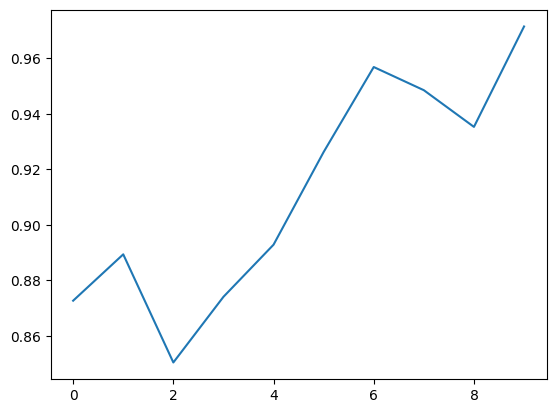

In [ ]:
n_inputs = 8 * 8 + 1
n_classes = 10
epochs = 10

# W = np.zeros((n_inputs, n_classes))
W = np.random.randn(n_inputs, n_classes)
training_acc = [0] * epochs
test_acc = 0
for i in range(epochs):
    W = multi_class_perceptron_epoch(X_train, y_train, W, 1)
    predictions = multi_class_classify(X_train, W)
    training_acc[i] = accuracy(predictions, y_train)

predictions = multi_class_classify(X_test, W)
test_acc = accuracy(predictions, y_test)
plt.plot(training_acc)
print("Training accuracy", training_acc)
print("Testing accuracy", test_acc)

In [334]:
image_num = 0

MCPerceptron guess: 7
Label: 9


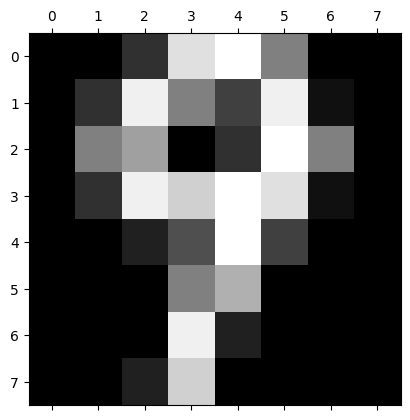

In [402]:
while np.argmax(W.T.dot(X[i])) == y[i]:
    i += 1
plt.matshow(data.images[i])
print(f"MCPerceptron guess: {np.argmax(W.T.dot(X[i]))}")
print(f"Label: {y[i]}")
i+=1

Let's use `scikit-learn`'s implementation of the perceptron algorithm. You can check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to understand what hyperparameters they are using and why the performances are different

In [315]:
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept=False, shuffle=False)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9735560194850382
0.9583333333333334
